## 멜론 시대별 차트로 보는 장르별 선호 흐름

In [439]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [440]:
names = ['Date', '애시드/퓨전/팝', '드라마OST', '클래식', '인디음악', '영화OST', '발라드', '댄스', '록/메탈',
         'R&B/Soul', '일렉트로니카', '랩/힙합', 'EDM', 'POP', 'J-POP', '성인가요', '재즈', '뉴에이지',
         '포크/블루스', '만화/게임OST', '-']

In [441]:
def get_data_frame():
    # print("current : ", year, month)
    load_file = "C:/Users/jay/Jay/기말플젝/final_data/final.csv"

    try:
        data = pd.read_csv(load_file, encoding='cp949',
                           names=names, header=None)
    except UnicodeError:
        try:
            data = pd.read_csv(load_file, encoding='utf-8',
                               names=names, header=None)
        except Exception as e:
            print(e)
    return data

In [443]:
def get_keys(data):
    keys = []
    for key in data.keys():
        if key != 'Date':
            keys.append([key])
    return keys

In [444]:
data = get_data_frame()
mellon_df = pd.DataFrame(data, columns=names)
elements = get_keys(data)

In [445]:
print("멜론 시대별 차트 데이터 크기 : ", mellon_df.shape)

멜론 시대별 차트 데이터 크기 :  (240, 21)


In [446]:
print(mellon_df.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 240 entries, nan to 238.0
Data columns (total 21 columns):
Date        240 non-null object
애시드/퓨전/팝    240 non-null object
드라마OST      240 non-null object
클래식         240 non-null object
인디음악        240 non-null object
영화OST       240 non-null object
발라드         240 non-null object
댄스          240 non-null object
록/메탈        240 non-null object
R&B/Soul    240 non-null object
일렉트로니카      240 non-null object
랩/힙합        240 non-null object
EDM         240 non-null object
POP         240 non-null object
J-POP       240 non-null object
성인가요        240 non-null object
재즈          240 non-null object
뉴에이지        240 non-null object
포크/블루스      240 non-null object
만화/게임OST    240 non-null object
-           240 non-null object
dtypes: object(21)
memory usage: 41.2+ KB
None


In [447]:
mellon_df.dtypes

Date        object
애시드/퓨전/팝    object
드라마OST      object
클래식         object
인디음악        object
영화OST       object
발라드         object
댄스          object
록/메탈        object
R&B/Soul    object
일렉트로니카      object
랩/힙합        object
EDM         object
POP         object
J-POP       object
성인가요        object
재즈          object
뉴에이지        object
포크/블루스      object
만화/게임OST    object
-           object
dtype: object

In [448]:
mellon_df['Date'] = pd.to_datetime(mellon_df['Date'], dayfirst=True, errors='coerce')
mellon_df['Date'] = mellon_df['Date'].map(dt.datetime.toordinal)


In [449]:
mellon_df['Date'].head()

NaN         1
0.0    730120
1.0    730151
2.0    730180
3.0    730211
Name: Date, dtype: int64

In [566]:
mellon_df  = mellon_df.dropna(axis = 0)

In [567]:
mellon_df

,Date,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,...,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
0.0,730120,0.0,0.0,0.0,0.000000,0.000000,34.615385,28.205128,19.230769,3.846154,...,10.256410,0.0,0.000000,0.0,0.000000,0.0,1.282051,1.282051,0.0,1.282051282051282
1.0,730151,0.0,0.0,0.0,1.515152,0.000000,34.848485,33.333333,18.181818,3.030303,...,7.575758,0.0,0.000000,0.0,0.000000,0.0,1.515152,0.000000,0.0,0.0
2.0,730180,0.0,1.4705882352941175,0.0,1.470588,0.000000,41.176471,26.470588,17.647059,2.941176,...,7.352941,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.4705882352941175
3.0,730211,0.0,1.4084507042253522,0.0,1.408451,0.000000,39.436620,30.985915,15.492958,4.225352,...,7.042254,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
4.0,730241,0.0,1.3333333333333335,0.0,0.000000,0.000000,40.000000,29.333333,12.000000,6.666667,...,10.666667,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234.0,737241,0.0,4.166666666666666,0.0,8.333333,3.333333,29.166667,15.833333,5.833333,8.333333,...,10.833333,0.0,10.833333,0.0,0.833333,0.0,0.000000,1.666667,0.0,0.0
235.0,737272,0.0,11.023622047244094,0.0,7.874016,1.574803,29.133858,14.960630,3.937008,7.874016,...,11.811024,0.0,7.874016,0.0,0.787402,0.0,0.000000,2.362205,0.0,0.0
236.0,737303,0.0,10.606060606060606,0.0,11.363636,1.515152,33.333333,11.363636,7.575758,6.818182,...,9.090909,0.0,6.818182,0.0,0.000000,0.0,0.000000,0.757576,0.0,0.0
237.0,737333,0.0,8.064516129032258,0.0,9.677419,0.806452,37.096774,8.870968,8.870968,8.064516,...,9.677419,0.0,5.645161,0.0,0.000000,0.0,0.000000,2.419355,0.0,0.0


In [452]:
# mellon_df = mellon_df.set_index('Date')

In [453]:
mellon_df.index.is_unique

True

### 대략적인 년, 월

In [507]:
# print( int((mellon_df.index.max()- mellon_df.index.min()).days/30/12),"년")

In [508]:
# print( int((mellon_df.index.max()- mellon_df.index.min()).days/30),"개월")

### 자료형을 object => 숫자로 바꿔줌

In [509]:
for key in mellon_df.keys():
    if key != 'Date' and key !='드라마OST' and key != '만화/게임OST' and key != '-':
        mellon_df[key] = pd.to_numeric(mellon_df[key], errors='coerce')
print(mellon_df.dtypes)

Date          int64
애시드/퓨전/팝    float64
드라마OST       object
클래식         float64
인디음악        float64
영화OST       float64
발라드         float64
댄스          float64
록/메탈        float64
R&B/Soul    float64
일렉트로니카      float64
랩/힙합        float64
EDM         float64
POP         float64
J-POP       float64
성인가요        float64
재즈          float64
뉴에이지        float64
포크/블루스      float64
만화/게임OST     object
-            object
dtype: object


In [510]:
mellon_df.head()

,Date,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,...,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
0.0,730120,0.0,0.0,0.0,0.000000,0.0,34.615385,28.205128,19.230769,3.846154,...,10.256410,0.0,0.0,0.0,0.0,0.0,1.282051,1.282051,0.0,1.282051282051282
1.0,730151,0.0,0.0,0.0,1.515152,0.0,34.848485,33.333333,18.181818,3.030303,...,7.575758,0.0,0.0,0.0,0.0,0.0,1.515152,0.000000,0.0,0.0
2.0,730180,0.0,1.4705882352941175,0.0,1.470588,0.0,41.176471,26.470588,17.647059,2.941176,...,7.352941,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.4705882352941175
3.0,730211,0.0,1.4084507042253522,0.0,1.408451,0.0,39.436620,30.985915,15.492958,4.225352,...,7.042254,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4.0,730241,0.0,1.3333333333333335,0.0,0.000000,0.0,40.000000,29.333333,12.000000,6.666667,...,10.666667,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [511]:
print('데이터셋 크기 : ', mellon_df.shape)

데이터셋 크기 :  (239, 21)


### 드라마OST, 만화/게임OST, 영화OST등은 다른장르와 중복이 많고 특정 장르가 아니라고 생각하여 제외

In [512]:
key = '댄스'
Y = mellon_df[key]
X = mellon_df.drop(['애시드/퓨전/팝', '드라마OST', '클래식', '인디음악', '영화OST', '발라드', 'EDM', '록/메탈',
         'R&B/Soul', '일렉트로니카', '랩/힙합', '발라드', 'POP', 'J-POP', '성인가요', '재즈', '뉴에이지',
         '포크/블루스', '만화/게임OST', '-'], axis=1, inplace=False)

In [514]:
X

,Date,댄스
0.0,730120,28.205128
1.0,730151,33.333333
2.0,730180,26.470588
3.0,730211,30.985915
4.0,730241,29.333333
...,...,...
234.0,737241,15.833333
235.0,737272,14.960630
236.0,737303,11.363636
237.0,737333,8.870968


In [563]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=200)

In [564]:
train_test_split(X, Y, test_size=0.3, random_state=200)

[         Date         댄스
 101.0  733194  18.348624
 13.0   730517  25.373134
 175.0  735446  25.663717
 224.0  736938  27.433628
 144.0  734503  32.380952
 ...       ...        ...
 42.0   731397  20.588235
 68.0   732190  19.811321
 16.0   730606  25.000000
 105.0  733316  25.454545
 26.0   730910  16.949153
 
 [167 rows x 2 columns],          Date         댄스
 146.0  734563  27.192982
 163.0  735081  32.743363
 190.0  735903  18.803419
 192.0  735964  18.260870
 104.0  733286  27.272727
 ...       ...        ...
 94.0   732981  10.280374
 69.0   732220  18.867925
 63.0   732037  12.745098
 171.0  735324  16.814159
 33.0   731124  26.865672
 
 [72 rows x 2 columns], 101.0    18.348624
 13.0     25.373134
 175.0    25.663717
 224.0    27.433628
 144.0    32.380952
            ...    
 42.0     20.588235
 68.0     19.811321
 16.0     25.000000
 105.0    25.454545
 26.0     16.949153
 Name: 댄스, Length: 167, dtype: float64, 146.0    27.192982
 163.0    32.743363
 190.0    18.803419
 192.0

In [551]:
lr= LinearRegression()

In [552]:
X_train

,Date,댄스
101.0,733194,18.348624
13.0,730517,25.373134
175.0,735446,25.663717
224.0,736938,27.433628
144.0,734503,32.380952
...,...,...
42.0,731397,20.588235
68.0,732190,19.811321
16.0,730606,25.000000
105.0,733316,25.454545


In [553]:
X_test

,Date,댄스
146.0,734563,27.192982
163.0,735081,32.743363
190.0,735903,18.803419
192.0,735964,18.260870
104.0,733286,27.272727
...,...,...
94.0,732981,10.280374
69.0,732220,18.867925
63.0,732037,12.745098
171.0,735324,16.814159


In [554]:
Y_train

101.0    18.348624
13.0     25.373134
175.0    25.663717
224.0    27.433628
144.0    32.380952
           ...    
42.0     20.588235
68.0     19.811321
16.0     25.000000
105.0    25.454545
26.0     16.949153
Name: 댄스, Length: 167, dtype: float64

In [555]:
Y_test

146.0    27.192982
163.0    32.743363
190.0    18.803419
192.0    18.260870
104.0    27.272727
           ...    
94.0     10.280374
69.0     18.867925
63.0     12.745098
171.0    16.814159
33.0     26.865672
Name: 댄스, Length: 72, dtype: float64

In [556]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [557]:
Y_predict = lr.predict(X_test)

In [558]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

In [559]:
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R^2(Variance score): {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 0.000, RMSE : 0.000
R^2(Variance score): 1.000


In [560]:
coef = pd.Series(data=np.round(lr.coef_,1), index=X.columns)

In [561]:
coef.sort_values(ascending=False)

댄스      1.0
Date    0.0
dtype: float64

C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45828 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)


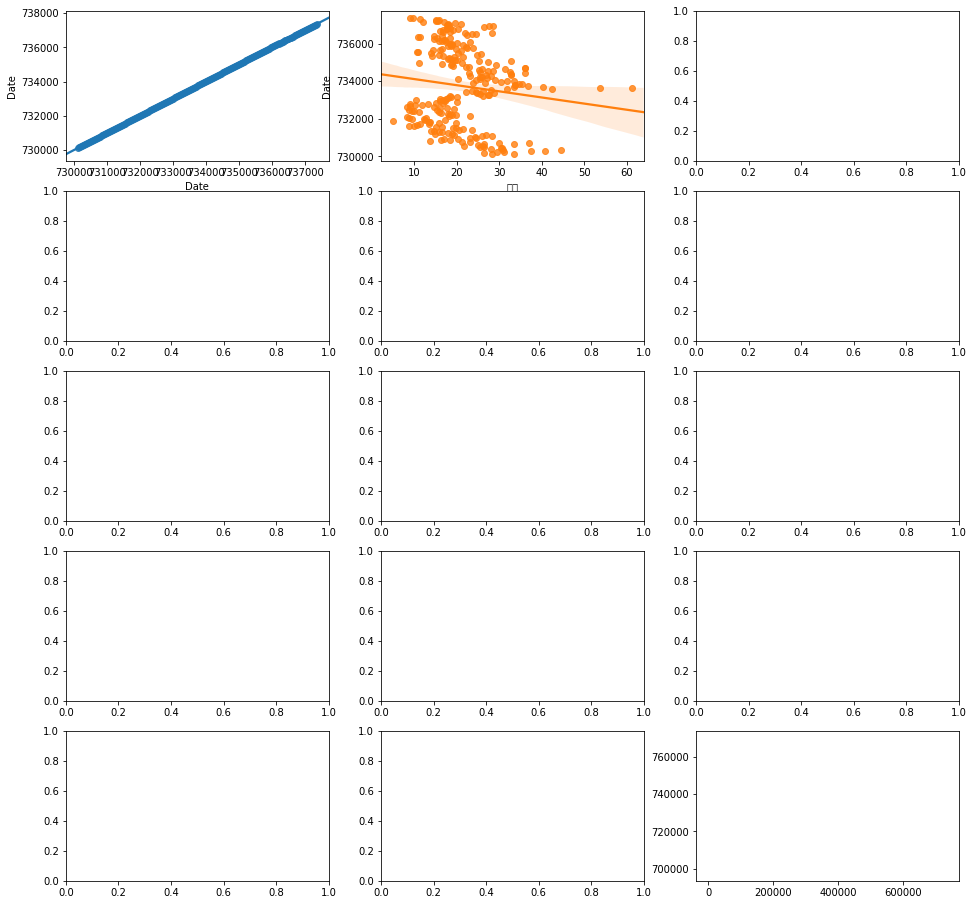

In [562]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows=5)
x_features = ['Date', key]

for i, feature in enumerate(x_features):
    row = i//3
    col = i%3
    sns.regplot(x=feature, y = 'Date', data=mellon_df.drop(['애시드/퓨전/팝', '드라마OST', 
        '클래식', '인디음악', '영화OST', 'EDM', '록/메탈',
         'R&B/Soul', '일렉트로니카', '랩/힙합', '발라드', 'POP', 'J-POP', '성인가요', '재즈', '뉴에이지',
         '포크/블루스', '만화/게임OST', '-'], axis=1, inplace=False), ax = axs[row][col])